<a href="https://colab.research.google.com/github/yubraaj11/Food-Recommendation-System/blob/master/Instacart_Recommendation_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1**. Regression: `Preprocessed_Instacart` dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/MyDrive/Datasets/Preprocessed_instacart_v1.csv'

In [ ]:
import pandas as pd
data = pd.read_csv(csv_path, index_col=0)
data

,order_dow,order_hour_of_day,product_id,aisle_id,department_id,target
0,0,0,577,48,1,1
1,0,0,1671,22,4,1
2,0,0,2880,110,4,1
3,0,0,513,101,3,1
4,0,0,1479,22,4,1
...,...,...,...,...,...,...
647405,6,23,276,107,16,0
647406,6,23,2778,3,19,0
647407,6,23,2745,50,17,0
647408,6,23,1948,78,16,0


In [ ]:
data['department_id'].min(), data['department_id'].max()

(1, 21)

In [ ]:
data['aisle_id'].min(), data['aisle_id'].max()


(1, 118)

In [ ]:
!pip install deepctr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, get_feature_names

In [ ]:
sparse_features = ['order_dow', 'order_hour_of_day', 'product_id', 'aisle_id', 'department_id']
target = ['target']

In [ ]:
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])
fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique() + 1, embedding_dim=4)
                        for feat in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=2020)
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

In [ ]:
train_model_input

{'order_dow': array([0, 4, 3, ..., 4, 5, 4]),
 'order_hour_of_day': array([ 7, 17, 16, ..., 17, 17, 13]),
 'product_id': array([ 814, 1478, 1202, ...,  695, 2136, 2037]),
 'aisle_id': array([100,  21,  96, ...,  77,  87,  28]),
 'department_id': array([ 2,  3, 18, ..., 15, 19,  6])}

## Regression

In [ ]:
# model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
# model
# model.compile("adam", "mse", metrics=['mse'], )

# history = model.fit(train_model_input, train[target].values,
#                     batch_size=256, epochs=20, verbose=2, validation_split=0.2, )
# pred_ans = model.predict(test_model_input, batch_size=256)
# print("test MSE", round(mean_squared_error(
#     test[target].values, pred_ans), 4))

In [ ]:
# model

In [ ]:
# import matplotlib.pyplot as plt

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(loss) + 1)

# plt.plot(epochs, loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# **2**. Classification: `Preprocessed_Instacart` dataset

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score

In [ ]:
model_1 = DeepFM(linear_feature_columns, dnn_feature_columns, task='binary')
# model_1
model_1.compile("adam", "binary_crossentropy", metrics=['binary_crossentropy'], )

history = model_1.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=20, verbose=2, validation_split=0.2, )
pred_ans = model_1.predict(test_model_input, batch_size=256)
print("test LogLoss", round(log_loss(test[target].values, pred_ans), 4))
print("test AUC", round(roc_auc_score(test[target].values, pred_ans), 4))

Epoch 1/20
1619/1619 - 8s - loss: 0.4442 - binary_crossentropy: 0.4440 - val_loss: 0.4331 - val_binary_crossentropy: 0.4328
Epoch 2/20
1619/1619 - 7s - loss: 0.4290 - binary_crossentropy: 0.4285 - val_loss: 0.4291 - val_binary_crossentropy: 0.4285
Epoch 3/20
1619/1619 - 6s - loss: 0.4260 - binary_crossentropy: 0.4253 - val_loss: 0.4271 - val_binary_crossentropy: 0.4263
Epoch 4/20
1619/1619 - 7s - loss: 0.4220 - binary_crossentropy: 0.4210 - val_loss: 0.4242 - val_binary_crossentropy: 0.4231
Epoch 5/20
1619/1619 - 6s - loss: 0.4176 - binary_crossentropy: 0.4162 - val_loss: 0.4237 - val_binary_crossentropy: 0.4223
Epoch 6/20
1619/1619 - 7s - loss: 0.4147 - binary_crossentropy: 0.4131 - val_loss: 0.4225 - val_binary_crossentropy: 0.4208
Epoch 7/20
1619/1619 - 6s - loss: 0.4119 - binary_crossentropy: 0.4100 - val_loss: 0.4238 - val_binary_crossentropy: 0.4218
Epoch 8/20
1619/1619 - 7s - loss: 0.4083 - binary_crossentropy: 0.4061 - val_loss: 0.4211 - val_binary_crossentropy: 0.4187
Epoch 9/

In [ ]:
!pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
model_1.save_weights('/content/drive/MyDrive/RecSys')

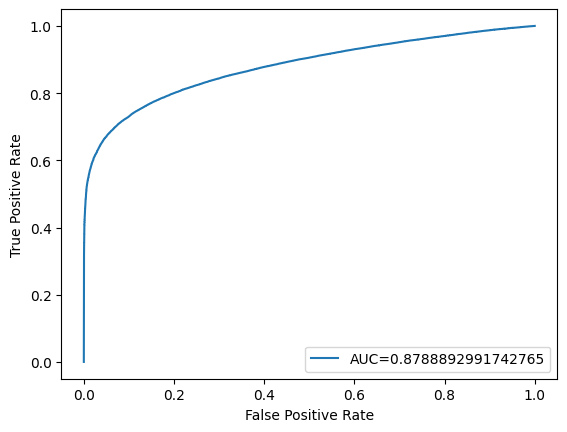

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_ans = model_1.predict(test_model_input, batch_size=256)
fpr, tpr, _ = roc_curve(test[target].values, pred_ans)
auc = roc_auc_score(test[target].values, pred_ans)
?
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### The curve above ⬆️ is right bounded so the models is good at classification of data into categories

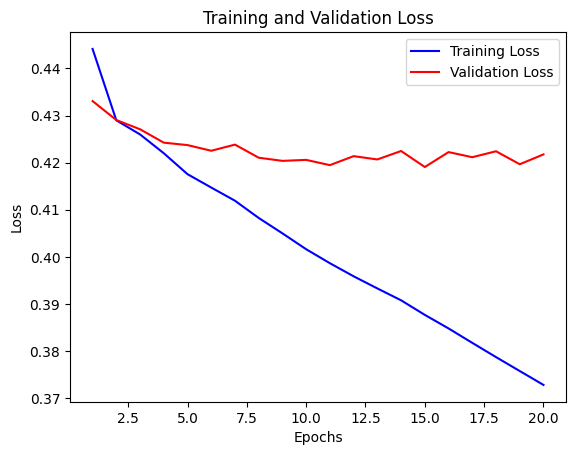

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Getting the dictionary of `product_id` as key and `aisle_id` and `department_id` as values

In [ ]:
import pickle
dict_path = '/content/drive/MyDrive/Datasets/product_dict_v1.pkl'

with open(dict_path, 'rb') as file:
    loaded_dict = pickle.load(file)

print(loaded_dict)

{1973: [78, 16], 1050: [75, 4], 560: [94, 13], 1045: [83, 16], 1476: [83, 16], 1046: [110, 4], 2787: [75, 4], 1302: [110, 4], 2738: [50, 17], 2221: [75, 4], 2796: [104, 1], 2038: [29, 7], 861: [52, 14], 676: [110, 4], 913: [75, 4], 1872: [15, 4], 197: [75, 4], 1250: [22, 4], 78: [97, 19], 362: [54, 15], 1780: [35, 1], 1855: [18, 13], 1803: [49, 16], 2060: [90, 7], 1527: [97, 19], 14: [70, 7], 2480: [29, 7], 1381: [70, 7], 1981: [103, 7], 12: [48, 1], 2519: [108, 14], 1241: [104, 1], 1655: [76, 16], 1212: [24, 7], 448: [54, 15], 1254: [18, 13], 1171: [103, 7], 1502: [103, 7], 588: [21, 19], 2810: [75, 4], 1714: [104, 1], 478: [33, 16], 444: [80, 13], 1891: [84, 18], 2532: [110, 4], 2494: [75, 4], 2121: [56, 19], 2561: [22, 4], 1995: [59, 7], 1479: [22, 4], 239: [22, 4], 1515: [24, 7], 1717: [75, 4], 1359: [101, 3], 1271: [88, 20], 1435: [76, 16], 481: [22, 4], 1114: [98, 16], 716: [117, 9], 518: [75, 4], 1526: [110, 4], 2416: [34, 1], 2768: [34, 1], 2350: [96, 12], 2248: [20, 16], 2878:

In [ ]:
loaded_dict.get(1478)

[90, 7]

# Recommending to user based on the day and hour provided by user `Context Aware Recommendation`

In [ ]:
day = int(input('Enter day of week 0-6: '))
hour = int(input('Enter hour of day 0-23: '))

Enter day of week 0-6: 4
Enter hour of day 0-23: 7


In [ ]:
import numpy as np

bigger_dict = {
    'order_dow': [],
    'order_hour_of_day': [],
    'product_id': [],
    'aisle_id': [],
    'department_id': []
}

for product_id, (aisle_id, department_id) in loaded_dict.items():
    bigger_dict['order_dow'].append(day)
    bigger_dict['order_hour_of_day'].append(hour)
    bigger_dict['product_id'].append(product_id)
    bigger_dict['aisle_id'].append(aisle_id)
    bigger_dict['department_id'].append(department_id)

for key in bigger_dict:
    bigger_dict[key] = np.array(bigger_dict[key])

print(bigger_dict)

{'order_dow': array([4, 4, 4, ..., 4, 4, 4]), 'order_hour_of_day': array([7, 7, 7, ..., 7, 7, 7]), 'product_id': array([1973, 1050,  560, ...,  443,  842,  541]), 'aisle_id': array([78, 75, 94, ..., 10, 34, 86]), 'department_id': array([16,  4, 13, ..., 17,  1,  7])}


In [ ]:
pred_ans = model_1.predict(bigger_dict, batch_size=2965)
print(pred_ans)

[[0.13419522]
 [0.93448687]
 [0.29663968]
 ...
 [0.20549832]
 [0.25373763]
 [0.17492059]]


In [ ]:
p_score = {}

for key, value in zip(loaded_dict.keys(), pred_ans):
    p_score[key] = value

print(p_score)

{1973: array([0.13419522], dtype=float32), 1050: array([0.93448687], dtype=float32), 560: array([0.29663968], dtype=float32), 1045: array([0.24214341], dtype=float32), 1476: array([0.8151276], dtype=float32), 1046: array([0.68828124], dtype=float32), 2787: array([0.77478975], dtype=float32), 1302: array([0.09718018], dtype=float32), 2738: array([0.37555134], dtype=float32), 2221: array([0.8606239], dtype=float32), 2796: array([0.3496532], dtype=float32), 2038: array([0.28847864], dtype=float32), 861: array([0.15881664], dtype=float32), 676: array([0.02685654], dtype=float32), 913: array([0.09602773], dtype=float32), 1872: array([0.7204883], dtype=float32), 197: array([0.1159275], dtype=float32), 1250: array([0.11463661], dtype=float32), 78: array([0.21681525], dtype=float32), 362: array([0.271966], dtype=float32), 1780: array([0.50090545], dtype=float32), 1855: array([0.32833213], dtype=float32), 1803: array([0.254312], dtype=float32), 2060: array([0.24514075], dtype=float32), 1527: ar

In [ ]:
sorted_items = sorted(p_score.items(), key=lambda x: x[1], reverse=True)

top_10 = sorted_items[:10]

for key, value in top_10:
    print(key, value)

1240 [0.99999964]
2839 [0.9999994]
1654 [0.99999934]
1541 [0.9999986]
1871 [0.99999756]
689 [0.9999966]
2820 [0.9999951]
1434 [0.99999]
1854 [0.9999889]
1249 [0.9999863]


In [ ]:
instacart_path = '/content/drive/MyDrive/Datasets/Instacart_original.csv'
instacart_df = pd.read_csv(instacart_path, index_col=0)
# instacart_df

In [ ]:
print(" ***************Recommending*************** \n")

for key, value in top_10:
    # print(key)
    product_name = instacart_df.loc[instacart_df['product_id'] == key, 'product_name'].iloc[0]
    # product_name = product_name.loc[0, 'product_name']

    print(f"Product Name: {product_name} ---------- score: {value}")

 ***************Recommending*************** 

Product Name: Cereal ---------- score: [0.99999964]
Product Name: Chocolate Strong Dark ---------- score: [0.9999994]
Product Name: White Whole Mushrooms ---------- score: [0.99999934]
Product Name: Organic Honey Nut O's Cereal ---------- score: [0.9999986]
Product Name: Feta Cheese In Brine ---------- score: [0.99999756]
Product Name: Honey Yoghurt ---------- score: [0.9999966]
Product Name: Cola ---------- score: [0.9999951]
Product Name: Hamburger Buns ---------- score: [0.99999]
Product Name: Organic Stage 2 Peaches & Bananas Baby Food ---------- score: [0.9999889]
Product Name: Lemon-Lime Fridge Pack Soda ---------- score: [0.9999863]
